Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


159/159 ━━━━━━━━━━━━━━━━━━━━ 87s 513ms/step - accuracy: 0.6334 - loss: 0.6436 - val_accuracy: 0.7388 - val_loss: 0.5422
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 80s 503ms/step - accuracy: 0.7090 - loss: 0.5397 - val_accuracy: 0.6875 - val_loss: 0.5579
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 82s 504ms/step - accuracy: 0.7615 - loss: 0.5133 - val_accuracy: 0.5833 - val_loss: 0.6596
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 81s 496ms/step - accuracy: 0.7577 - loss: 0.4970 - val_accuracy: 0.6101 - val_loss: 1.0240
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 83s 503ms/step - accuracy: 0.8140 - loss: 0.4498 - val_accuracy: 0.8398 - val_loss: 0.4052


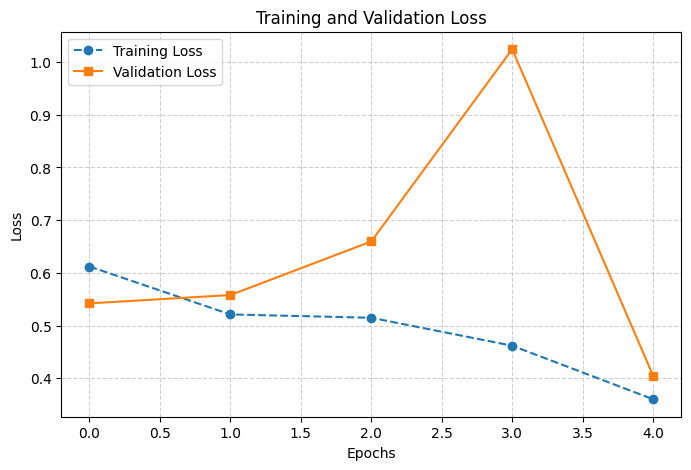

(5068, 500) (1267, 500)


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset
df = pd.read_csv("fake_or_real_news.csv")

# Prepare the text data
texts = df["text"].values
labels = df["label"].values

# Encode labels (FAKE = 0, REAL = 1)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenization parameters
max_words = 10000  # Maximum words in the vocabulary
max_len = 500  # Maximum length of sequences

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='s')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display shape of processed data
print(X_train_pad.shape, X_test_pad.shape)
